Importing data from dataset 

1. investigating classes 

In [1]:
import pandas as pd
import numpy as np

file='../raw_data/1.0.3/training_data.csv'
df=pd.read_csv(file)
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [2]:
df.Outcome.value_counts()

Normal      486
Abnormal    456
Name: Outcome, dtype: int64

In [3]:
df.Murmur.value_counts()

Absent     695
Present    179
Unknown     68
Name: Murmur, dtype: int64

In [4]:
df_new=pd.DataFrame({
    'Patient_ID': df['Patient ID'], 
    'Baseline': df.Murmur, 
    'Outcome': df.Outcome,
    'Height': df.Height,
    'Weight': df.Weight
    })
df_new.head()

,Patient_ID,Baseline,Outcome,Height,Weight
0,2530,Absent,Abnormal,98.0,15.9
1,9979,Present,Abnormal,103.0,13.1
2,9983,Unknown,Abnormal,115.0,19.1
3,13918,Present,Abnormal,98.0,15.9
4,14241,Present,Abnormal,87.0,11.2


In [5]:
np.sum(df['Additional ID'].count())

140

In [6]:
duplica=df['Additional ID'].unique()[1:]
duplica

array([50379., 49630., 49622., 49821., 49761., 49754., 69060., 69068.,
       69079., 38337., 36327., 69096., 69095., 69120., 69125., 68175.,
       46778., 46579., 68182., 45843., 69147., 69155., 69176., 68219.,
       68194., 68204., 68222., 68213., 68260., 68279., 68303., 68306.,
       68298., 68318., 68330., 68368., 68379., 68377., 68359., 68337.,
       68425., 68395., 68407., 68394., 68404., 68406., 68560., 68470.,
       68484., 68465., 68460., 68456., 68477., 68487., 68498., 68567.,
       68532., 68545., 68556., 68582., 68576., 23625., 68632., 68849.,
       63581., 68857., 68864., 68874., 68888., 68886., 68895., 68901.,
       68909., 68908., 85234., 68952., 50624., 49751., 49776., 49897.,
       49963., 49986., 49896., 49979., 50023., 50030., 50066., 50054.,
       50056., 50067., 50080., 50127., 50125., 50096., 50115., 50099.,
       50155., 50151., 50165., 50166., 50152., 50150., 50220., 50218.,
       50216., 50213., 50230., 50214., 50233., 50261., 50303., 50312.,
      

In [7]:
def drop_duplicates(data):
    doublon=data[['Patient ID','Additional ID']].dropna()
    liste_couple=[]
    for i in range(len(doublon)):
        min_id=min(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        max_id=max(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        if [min_id,max_id] not in liste_couple:
            liste_couple.append([min_id,max_id])
    list_id_drop=np.array(liste_couple)[:,1]
    data_drop_dup=data[~data['Patient ID'].isin(list_id_drop)]
    return data_drop_dup

In [8]:
df_drop_dup=drop_duplicates(df)

In [9]:
df_drop_dup.Outcome.value_counts()

Normal      473
Abnormal    399
Name: Outcome, dtype: int64

In [10]:
dff=df_drop_dup[df_drop_dup['Recording locations:']=='AV+PV+TV+MV']
dff

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,85337,AV+PV+TV+MV,Child,Male,130.0,27.3,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
935,85338,AV+PV+TV+MV,NaN,Female,NaN,NaN,True,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


In [11]:
dff.Outcome.value_counts()

Normal      288
Abnormal    244
Name: Outcome, dtype: int64

2. exploring .hea documents

In [12]:
import wfdb

head_1=wfdb.rdsamp('../raw_data/1.0.3/training_data/2530_AV')
head_1

(array([[-425.],
        [1045.],
        [ 518.],
        ...,
        [ 509.],
        [ 443.],
        [ 122.]]),
 {'fs': 4000,
  'sig_len': 94400,
  'n_sig': 1,
  'base_date': None,
  'base_time': None,
  'units': ['mV'],
  'sig_name': ['AV'],
  'comments': []})

In [13]:
head_1[0].shape

(94400, 1)

In [14]:
head_1[0].flatten()

array([-425., 1045.,  518., ...,  509.,  443.,  122.])

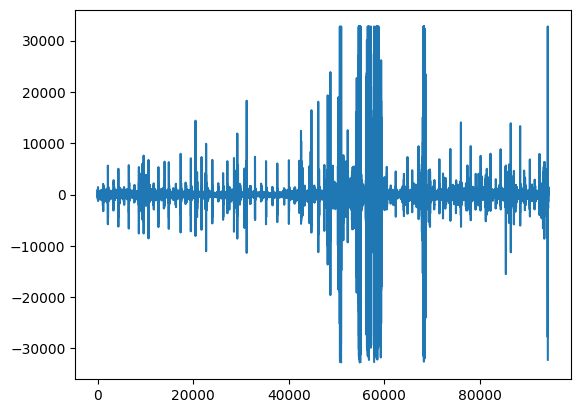

In [16]:
import matplotlib.pyplot as plt

plt.plot(head_1[0].flatten());

3. exploring .wav with librosa

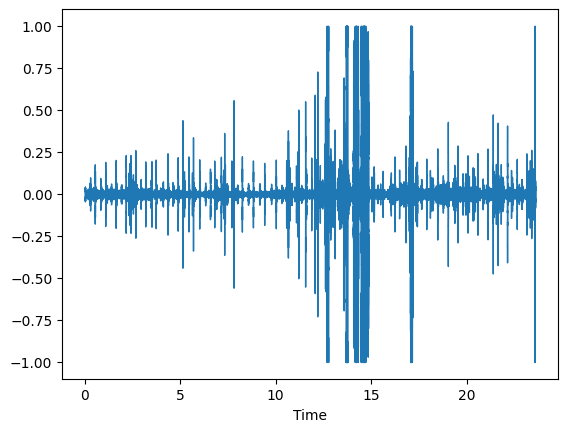

In [17]:
import librosa
import librosa.display

x_1, sample_rate =librosa.load('../raw_data/1.0.3/training_data/2530_AV.wav', sr=None)
librosa.display.waveshow(x_1, sr = sample_rate)

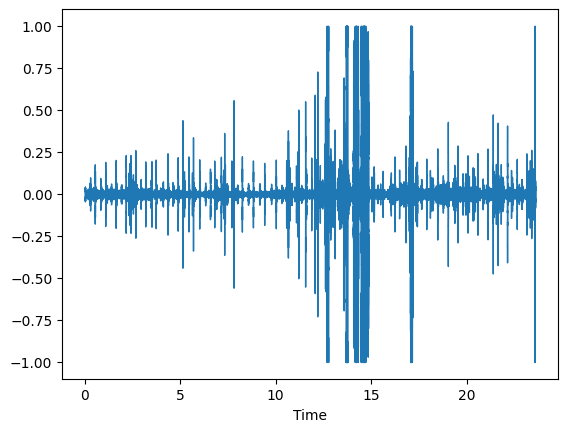

In [18]:
x_2, fs_2=librosa.load('../raw_data/1.0.3/training_data/2530_AV.wav', sr=4000)
librosa.display.waveshow(x_2, sr=fs_2)

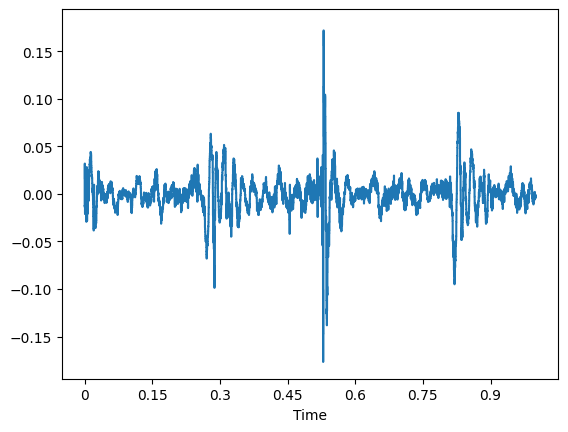

In [30]:
librosa.display.waveshow(x_2[0:4000], sr=fs_2)

In [19]:
AV=[]

for i in dff['Patient ID']:
    file='../raw_data/1.0.3/training_data/' + str(i) + '_AV.wav'
    av_i, fs_2=librosa.load(file, sr=4000)
    AV.append(av_i)
AV

[array([-0.01296997,  0.03189087,  0.01580811, ...,  0.01553345,
         0.01351929,  0.00372314], dtype=float32),
 array([0.05044556, 0.11642456, 0.09463501, ..., 0.00570679, 0.01062012,
        0.00161743], dtype=float32),
 array([ 0.02853394,  0.04168701,  0.06002808, ..., -0.05667114,
        -0.07354736, -0.05285645], dtype=float32),
 array([ 0.        ,  0.00100708,  0.00921631, ..., -0.01089478,
        -0.00231934,  0.01565552], dtype=float32),
 array([ 0.0067749 , -0.00115967, -0.0050354 , ...,  0.05020142,
         0.04095459,  0.02581787], dtype=float32),
 array([ 0.18899536,  0.08422852, -0.14620972, ..., -0.00637817,
        -0.01992798, -0.00280762], dtype=float32),
 array([ 0.00842285, -0.00323486,  0.00177002, ..., -0.02862549,
        -0.03369141, -0.02478027], dtype=float32),
 array([0.02697754, 0.0199585 , 0.012146  , ..., 0.05847168, 0.05789185,
        0.05587769], dtype=float32),
 array([-0.04431152, -0.03509521, -0.00067139, ...,  0.00692749,
         0.01394653

In [20]:
import glob
for i in glob.glob('/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/*.npy'):
    print(np.load(i))

[ -0.03308105  -0.04598999  -0.02947998 ... -10.         -10.
 -10.        ]
[-4.760742e-03 -8.453369e-03 -8.666992e-03 ... -1.000000e+01 -1.000000e+01
 -1.000000e+01]
[-2.1362305e-03  1.9226074e-03  1.8188477e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.9226074e-03 -8.7890625e-03 -1.7089844e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.5024414e-03  2.9602051e-03  2.8381348e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-2.2277832e-03  1.7150879e-02  2.6855469e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.13220215e-02  8.85009766e-04  8.20922852e-03 ... -1.00000000e+01
 -1.00000000e+01 -1.00000000e+01]
[  0.04492188   0.03683472   0.02246094 ... -10.         -10.
 -10.        ]
[-1.2512207e-03 -4.3029785e-03 -4.4860840e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.2207031e-04 -4.7607422e-03 -2.8839111e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.03897095   0.05929565   0.03671265 ... -10.         -10.
 -10.   

[-4.3640137e-03 -6.1035156e-04  1.6479492e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.1253357    0.19070435   0.08721924 ... -10.         -10.
 -10.        ]
[-1.1260986e-02 -7.4157715e-03  4.5349121e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.9531250e-03 -1.3702393e-02 -2.5665283e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.4414062e-04  6.0424805e-03  2.7465820e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.08190918   0.7642822    0.27963257 ... -10.         -10.
 -10.        ]
[-2.0446777e-03  3.7536621e-03  2.3834229e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.02697754   0.0199585    0.012146   ... -10.         -10.
 -10.        ]
[  0.5812683    0.52856445   0.48632812 ... -10.         -10.
 -10.        ]
[ 1.0986328e-03  2.2277832e-02  1.8096924e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.04019165  -0.06570435  -0.17544556 ... -10.         -10.
 -10.        ]
[ 3.2348633e-03  1.7089844e-03 -1

[ -0.04547119  -0.06344604  -0.04006958 ... -10.         -10.
 -10.        ]
[ -0.13494873  -0.11178589  -0.11993408 ... -10.         -10.
 -10.        ]
[  0.03259277   0.03952026   0.04388428 ... -10.         -10.
 -10.        ]
[-1.1108398e-02 -7.2326660e-03 -5.7678223e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.1901855e-03 -6.2866211e-03  2.9907227e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.6245117e-03 -5.0354004e-03  1.0437012e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.0166626    0.01794434   0.01480103 ... -10.         -10.
 -10.        ]
[ -0.01101685  -0.6064148   -0.43185425 ... -10.         -10.
 -10.        ]
[ 3.2043457e-02  2.4322510e-02  9.6740723e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.05551147  -0.02807617  -0.0201416  ... -10.         -10.
 -10.        ]
[ -0.034729    -0.11392212  -0.11102295 ... -10.         -10.
 -10.        ]
[ 1.6174316e-03  4.6386719e-03 -2.3376465e-02 ... -1.0000000e+01
 -1.0000

[-3.3874512e-03 -2.8076172e-03 -4.4555664e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.06314087  -0.07446289  -0.02026367 ... -10.         -10.
 -10.        ]
[ 1.1962891e-02  6.5307617e-03  1.6174316e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.6031189   -0.39813232  -0.28701782 ... -10.         -10.
 -10.        ]
[  0.03192139   0.01959229  -0.03695679 ... -10.         -10.
 -10.        ]
[-7.9040527e-03 -1.4251709e-02 -1.0986328e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.9977722   -0.8847656   -0.29525757 ... -10.         -10.
 -10.        ]
[  0.02331543   0.02493286   0.02554321 ... -10.         -10.
 -10.        ]
[  0.02792358   0.02783203   0.02493286 ... -10.         -10.
 -10.        ]
[  0.02017212   0.1116333   -0.03881836 ... -10.         -10.
 -10.        ]
[  0.02835083   0.03186035  -0.05297852 ... -10.         -10.
 -10.        ]
[ -0.28015137  -0.2350769    0.1227417  ... -10.         -10.
 -10.        ]
[ 1.5380859e-02 

[ 4.4860840e-03  7.9650879e-03  2.8045654e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.5258789e-04  7.9040527e-03  4.1351318e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-3.6621094e-03 -2.3406982e-02 -1.0217285e-01 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.13800049   0.24349976   0.18167114 ... -10.         -10.
 -10.        ]
[ 1.40686035e-02  1.89819336e-02  9.46044922e-03 ... -1.00000000e+01
 -1.00000000e+01 -1.00000000e+01]
[ 1.8768311e-02  1.1230469e-02 -5.2490234e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.0350647   -0.03439331  -0.03491211 ... -10.         -10.
 -10.        ]
[ 1.6601562e-02 -2.5939941e-03 -5.4931641e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.0681152e-02  7.4157715e-03  2.5329590e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 5.6457520e-03 -3.2653809e-03 -4.0588379e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.01361084  -0.09213257  -0.03735352 ... -10.         -10.
 -

[  0.14361572   0.25613403   0.11514282 ... -10.         -10.
 -10.        ]
[ -0.1335144   -0.10064697  -0.08782959 ... -10.         -10.
 -10.        ]
[-6.5917969e-03 -5.0659180e-03  2.7160645e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 7.2631836e-03  3.3996582e-02  1.4801025e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.0151062    0.01730347   0.01739502 ... -10.         -10.
 -10.        ]
[ -0.01660156  -0.01596069  -0.01361084 ... -10.         -10.
 -10.        ]
[ -0.03713989   0.11431885   0.10665894 ... -10.         -10.
 -10.        ]
[  0.02981567   0.05194092   0.06045532 ... -10.         -10.
 -10.        ]
[ 9.7656250e-03 -1.4465332e-02 -3.9916992e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-2.5024414e-03  5.4931641e-04  3.9367676e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.0589600e-02 -3.9672852e-03  6.9274902e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.5133362    0.5980835   -0.14154053 ... -10.     

[-9.1247559e-03 -2.3803711e-03  3.1433105e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 7.5988770e-03  1.2390137e-02 -1.0437012e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.5869141e-02  6.9274902e-03 -6.6528320e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-3.9123535e-02 -1.3763428e-02  1.4343262e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.4719238e-03  1.6479492e-03  1.1169434e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.02593994  -0.02975464  -0.06744385 ... -10.         -10.
 -10.        ]
[ -0.01208496  -0.01989746  -0.01809692 ... -10.         -10.
 -10.        ]
[ -0.02523804  -0.02307129  -0.02807617 ... -10.         -10.
 -10.        ]
[ 8.6975098e-03  1.1474609e-02 -9.5520020e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.02078247  -0.03311157   0.01852417 ... -10.         -10.
 -10.        ]
[ 1.9531250e-03 -2.9907227e-03  2.0446777e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.7465820e-

[-3.5705566e-03 -6.4697266e-03 -9.9182129e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 8.8500977e-04  4.2114258e-03 -1.6479492e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.0291748    0.15042114   0.10913086 ... -10.         -10.
 -10.        ]
[-1.3061523e-02 -6.8664551e-03 -7.4462891e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.15319824   0.13931274   0.16641235 ... -10.         -10.
 -10.        ]
[ -0.02410889  -0.06411743  -0.02191162 ... -10.         -10.
 -10.        ]
[ 3.7231445e-03  2.7770996e-03  6.8359375e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.4831543e-02  4.9438477e-03  3.2958984e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.04464722   0.06390381   0.08096313 ... -10.         -10.
 -10.        ]
[  0.04742432   0.04208374   0.01412964 ... -10.         -10.
 -10.        ]
[  0.03109741   0.02548218   0.01132202 ... -10.         -10.
 -10.        ]
[  0.06103516   0.0635376    0.0512085  ... -10.     

[ 2.0202637e-02  1.2969971e-02 -5.2490234e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.2207031e-03 -9.4604492e-04 -1.4953613e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 6.0516357e-02  4.4006348e-02  9.1857910e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.18127441  -0.02755737  -0.09637451 ... -10.         -10.
 -10.        ]
[ 3.4240723e-02  4.0893555e-03  1.9653320e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.06826782   0.04898071  -0.01947021 ... -10.         -10.
 -10.        ]
[-1.2634277e-02  4.7668457e-02  6.6223145e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 8.850098e-03  8.697510e-03 -6.378174e-03 ... -1.000000e+01 -1.000000e+01
 -1.000000e+01]
[  0.05206299   0.07498169   0.08401489 ... -10.         -10.
 -10.        ]
[  0.13256836  -0.4258423   -0.5388794  ... -10.         -10.
 -10.        ]
[ 3.5034180e-02 -7.8125000e-03 -2.1575928e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.3122559e-03 -5.

[-4.6997070e-03  1.2664795e-02  7.1716309e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 8.7585449e-03  1.0375977e-03  1.3793945e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.16021729  -0.06497192   0.0211792  ... -10.         -10.
 -10.        ]
[-1.2145996e-02 -9.8876953e-03 -6.8969727e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.01821899   0.04348755   0.05963135 ... -10.         -10.
 -10.        ]
[ 3.2775879e-02  7.9345703e-04  1.1901855e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.29226685  -0.21124268  -0.02603149 ... -10.         -10.
 -10.        ]
[  0.02197266   0.01956177   0.0166626  ... -10.         -10.
 -10.        ]
[-1.0681152e-02 -4.8828125e-03  1.1291504e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.01821899  -0.0194397   -0.0133667  ... -10.         -10.
 -10.        ]
[-3.0517578e-05 -2.1362305e-04 -9.4604492e-04 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-2.7069092e-01 -8.5021973e-02  6

[-4.1198730e-03 -1.0864258e-02 -1.5960693e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.5402832   -0.22402954  -0.92855835 ... -10.         -10.
 -10.        ]
[-2.4414062e-03 -4.7302246e-03 -1.7700195e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.0009766e-02  4.6691895e-03 -3.3569336e-04 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 3.5858154e-02  9.8571777e-03 -3.2348633e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.5533447e-02  4.9438477e-03  1.1291504e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.01251221   0.04830933   0.2697754  ... -10.         -10.
 -10.        ]
[ -0.0519104   -0.05029297  -0.03591919 ... -10.         -10.
 -10.        ]
[  0.05560303   0.27017212   0.16998291 ... -10.         -10.
 -10.        ]
[ -0.2569275   -0.23019409  -0.07778931 ... -10.         -10.
 -10.        ]
[ -0.02416992   0.02984619   0.30136108 ... -10.         -10.
 -10.        ]
[ 3.7231445e-03  5.3405762e-03  6.3171387e-03 ... -1.

[  0.01309204   0.01550293   0.02737427 ... -10.         -10.
 -10.        ]
[ -0.14291382   0.05941772  -0.01760864 ... -10.         -10.
 -10.        ]
[-1.9744873e-02 -1.4984131e-02 -4.3334961e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.02972412   0.02844238   0.03173828 ... -10.         -10.
 -10.        ]
[-1.4709473e-02 -1.1932373e-02 -1.0375977e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.18899536   0.08422852  -0.14620972 ... -10.         -10.
 -10.        ]
[ -0.02011108  -0.02828979   0.04067993 ... -10.         -10.
 -10.        ]
[ -0.09817505  -0.04598999  -0.03167725 ... -10.         -10.
 -10.        ]
[-2.4810791e-02  5.6762695e-03 -6.4392090e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.3998108   -0.17926025  -0.06756592 ... -10.         -10.
 -10.        ]
[-2.2583008e-03 -2.4108887e-03  4.7607422e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.01513672  -0.01412964  -0.01254272 ... -10.         -10.
 -10.      

[ 6.1645508e-03 -1.4343262e-03 -1.8646240e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.1331787e-02  2.4505615e-02  5.4016113e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-4.3853760e-02 -2.2003174e-02 -3.9062500e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.07177734  -0.02078247  -0.11981201 ... -10.         -10.
 -10.        ]
[ 2.5939941e-03  1.9989014e-02  6.5673828e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 7.0190430e-03  5.0048828e-03 -2.3834229e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.03533936   0.01031494  -0.04714966 ... -10.         -10.
 -10.        ]
[  0.02484131  -0.01596069  -0.03613281 ... -10.         -10.
 -10.        ]
[  0.10949707   0.09277344   0.05154419 ... -10.         -10.
 -10.        ]
[ 1.1138916e-02  2.5329590e-03  9.3994141e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.3847351   -0.35217285  -0.32232666 ... -10.         -10.
 -10.        ]
[ 8.3618164e-03  1.6540527e-02  1

[  0.01318359   0.01922607   0.01757812 ... -10.         -10.
 -10.        ]
[-4.9438477e-03 -2.2521973e-02 -4.3975830e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 4.0588379e-03 -1.7089844e-03 -5.5236816e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.06039429  -0.05883789  -0.02481079 ... -10.         -10.
 -10.        ]
[-3.1433105e-03  6.2255859e-03  3.2653809e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-4.4006348e-02 -4.5715332e-02  3.7231445e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.4221191e-02 -2.0904541e-02  6.7138672e-04 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-9.3078613e-03 -8.9416504e-03 -1.1169434e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-4.7607422e-03 -6.3781738e-03 -5.9509277e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.07666016  -0.07666016  -0.06515503 ... -10.         -10.
 -10.        ]
[ -0.10424805  -0.07385254  -0.06051636 ... -10.         -10.
 -10.        ]
[ -0.13391113

[-1.1901855e-03 -1.2817383e-03 -1.2817383e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-7.3242188e-04 -6.5917969e-03 -1.0070801e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.02355957  -0.02346802  -0.04473877 ... -10.         -10.
 -10.        ]
[ 2.0446777e-03 -1.3427734e-03  3.0212402e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.3177490e-01 -1.1972046e-01 -1.5869141e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.01300049   0.01132202   0.01037598 ... -10.         -10.
 -10.        ]
[ 7.6293945e-04 -1.8615723e-03  3.6621094e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 6.1035156e-05  4.1809082e-03  2.6062012e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 4.3029785e-03 -4.6081543e-03 -3.6621094e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-6.8359375e-03 -2.4719238e-03  7.7514648e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.04360962   0.06066895   0.01470947 ... -10.         -10.
 -10.   

[ 2.4993896e-02  1.8615723e-02  8.9721680e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 6.796265e-02 -8.026123e-03  4.437256e-02 ... -1.000000e+01 -1.000000e+01
 -1.000000e+01]
[-5.92041016e-03 -1.01623535e-02 -1.14746094e-02 ... -1.00000000e+01
 -1.00000000e+01 -1.00000000e+01]
[-6.5002441e-03 -2.2888184e-03  1.1291504e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.3223877e-02 -2.2552490e-02 -1.1291504e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 6.649780e-02  9.063721e-03 -2.808838e-01 ... -1.000000e+01 -1.000000e+01
 -1.000000e+01]
[ -0.19256592  -0.16455078  -0.12918091 ... -10.         -10.
 -10.        ]
[ 7.2448730e-02  6.0546875e-02 -4.4250488e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.5258789e-03  1.4099121e-02  4.1503906e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.6784668e-02 -1.3305664e-02 -2.7160645e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-7.6599121e-03  2.4108887e-03  3.4149170e-02 ... -1.000

[ 1.54418945e-02  2.16064453e-02  3.78417969e-03 ... -1.00000000e+01
 -1.00000000e+01 -1.00000000e+01]
[ 6.3995361e-02  5.5908203e-02 -1.8310547e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-8.5144043e-03 -2.4017334e-02 -1.3061523e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 2.2583008e-02 -4.4555664e-03 -3.1738281e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.06466675   0.05325317   0.01831055 ... -10.         -10.
 -10.        ]
[ -0.75531006  -0.3433838    0.20440674 ... -10.         -10.
 -10.        ]
[-1.9958496e-02 -1.1840820e-02 -1.7395020e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.01226807   0.02926636  -0.03109741 ... -10.         -10.
 -10.        ]
[  0.90252686   0.19366455  -0.67626953 ... -10.         -10.
 -10.        ]
[  0.07913208   0.05718994   0.04180908 ... -10.         -10.
 -10.        ]
[-1.1596680e-02 -5.5847168e-03  1.4221191e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 7.1105957e-03 -1.0955811e

[ 1.0253906e-02 -6.7138672e-04 -8.3618164e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-1.2905884e-01 -1.1126709e-01  5.7983398e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 4.0252686e-02  2.7465820e-02 -2.0446777e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-6.7443848e-03 -8.0261230e-03 -5.1574707e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 1.3427734e-03  3.7841797e-03  6.0119629e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-7.8430176e-03 -7.8735352e-03 -1.1657715e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 5.9509277e-03  9.1552734e-04 -2.1911621e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.09686279  -0.06149292  -0.04602051 ... -10.         -10.
 -10.        ]
[  0.02651978   0.01873779   0.02096558 ... -10.         -10.
 -10.        ]
[  0.02151489   0.01742554   0.01593018 ... -10.         -10.
 -10.        ]
[ 8.8500977e-03  1.4953613e-03 -9.7045898e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.000000

[-7.8430176e-03 -4.5471191e-03 -5.6152344e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ 4.2938232e-02 -3.6621094e-03 -2.6824951e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[-2.2888184e-03  1.7395020e-03  6.5612793e-03 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[  0.04849243   0.03686523   0.05297852 ... -10.         -10.
 -10.        ]
[ 1.9226074e-03  1.4160156e-02  3.5583496e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.18371582   0.3821106   -0.16073608 ... -10.         -10.
 -10.        ]
[  0.34292603   0.07910156   0.3866577  ... -10.         -10.
 -10.        ]
[ -1.          -0.9186096   -0.28668213 ... -10.         -10.
 -10.        ]
[-3.2501221e-02 -2.7770996e-03  2.7587891e-02 ... -1.0000000e+01
 -1.0000000e+01 -1.0000000e+01]
[ -0.01174927  -0.01263428  -0.01760864 ... -10.         -10.
 -10.        ]
[ -0.10751343  -0.01422119   0.21646118 ... -10.         -10.
 -10.        ]
[  0.35491943   0.42108154   0.6024475  ... -10.     

In [21]:
glob.glob(f'/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/*.npy')

['/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/68427_MV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/50628_MV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/50231_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/84851_TV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/68659_TV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/50331_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/78582_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/84942_PV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/49659_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/85245_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/85345_AV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/50314_PV.npy',
 '/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/tmp_dir/50104_MV.npy',
 '/Users/fab

In [22]:
X_pre=[]

for i in dff['Patient ID']:
    i_all=[]
    
    file_1='../raw_data/1.0.3/tmp_dir_2/' + str(i) + '_AV.npy'
    av = np.load(file_1)[0:90000]
    i_all.append(av)
    
    file_2='../raw_data/1.0.3/tmp_dir_2/' + str(i) + '_MV.npy'
    mv = np.load(file_2)[0:90000]
    i_all.append(mv)
    
    file_3='../raw_data/1.0.3/tmp_dir_2/' + str(i) + '_PV.npy'
    pv = np.load(file_3)[0:90000]
    i_all.append(pv)
    
    file_4='../raw_data/1.0.3/tmp_dir_2/' + str(i) + '_TV.npy'
    tv = np.load(file_4)[0:90000]
    i_all.append(tv)
    
    X_pre.append(np.array(i_all).transpose())

X_pre

[array([[-1.2969971e-02,  3.8671875e-01,  7.9132080e-02,  6.9458008e-02],
        [ 3.1890869e-02,  3.0642700e-01,  5.7189941e-02,  7.1502686e-02],
        [ 1.5808105e-02,  9.8114014e-02,  4.1809082e-02,  7.4707031e-02],
        ...,
        [-4.1809082e-03, -8.5449219e-04, -1.0000000e+01, -1.0000000e+01],
        [-8.8806152e-03,  1.4343262e-03, -1.0000000e+01, -1.0000000e+01],
        [-4.3945312e-03,  8.2397461e-04, -1.0000000e+01, -1.0000000e+01]],
       dtype=float32),
 array([[ 5.0445557e-02,  1.5377808e-01,  9.9475098e-01,  7.4462891e-03],
        [ 1.1642456e-01,  1.8164062e-01,  8.6334229e-01, -1.0949707e-01],
        [ 9.4635010e-02,  1.7559814e-01,  2.7011108e-01, -6.8905640e-01],
        ...,
        [-1.0000000e+01, -1.0000000e+01, -1.0000000e+01,  3.4881592e-02],
        [-1.0000000e+01, -1.0000000e+01, -1.0000000e+01,  9.4451904e-02],
        [-1.0000000e+01, -1.0000000e+01, -1.0000000e+01,  1.6226196e-01]],
       dtype=float32),
 array([[ 2.85339355e-02, -2.34680176e

In [23]:
X_4rec=np.array(X_pre)
X_4rec.shape

(532, 90000, 4)

In [24]:
y_4rec=dff.Outcome.map({'Abnormal': 1, 'Normal': 0})
y_4rec.shape

(532,)

In [25]:
from tensorflow.keras.layers import Masking, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

In [26]:
from sklearn.model_selection import train_test_split

X_4rec_train, X_4rec_test, y_4rec_train, y_4rec_test= train_test_split(X_4rec, y_4rec, test_size=0.3, random_state=1)

In [27]:
model_4rec=Sequential()
model_4rec.add(Masking(mask_value=-10, input_shape=(90000,4)))
model_4rec.add(GRU(units=2, activation='tanh'))
model_4rec.add(Dense(20, activation='tanh'))
model_4rec.add(Dense(10, activation='tanh'))
model_4rec.add(Dense(1, activation='sigmoid'))

model_4rec.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 90000, 4)          0         
                                                                 
 gru (GRU)                   (None, 2)                 48        
                                                                 
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop=RMSprop(learning_rate=0.001)
model_4rec.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=[Recall()])



In [29]:
es=EarlyStopping(patience=5, restore_best_weights=True)
history=model_4rec.fit(X_4rec_train, y_4rec_train, batch_size=32, epochs=150, validation_split=0.3, callbacks=[es])

Epoch 1/150


/Users/fabianlaw/.pyenv/versions/3.10.6/envs/circor/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-29 12:38:11.818709: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 1256s 141s/step - loss: 0.7061 - recall: 0.6723 - val_loss: 0.7079 - val_recall: 0.6316
Epoch 2/150
9/9 [==============================] - 1283s 142s/step - loss: 0.6929 - recall: 0.3697 - val_loss: 0.7062 - val_recall: 0.6316
Epoch 3/150
9/9 [==============================] - 1285s 147s/step - loss: 0.6911 - recall: 0.2269 - val_loss: 0.7084 - val_recall: 0.0526
Epoch 4/150
9/9 [==============================] - 999s 114s/step - loss: 0.6907 - recall: 0.1513 - val_loss: 0.7078 - val_recall: 0.0526
Epoch 5/150
9/9 [==============================] - 975s 111s/step - loss: 0.6888 - recall: 0.1513 - val_loss: 0.7075 - val_recall: 0.0526
Epoch 6/150
9/9 [==============================] - 1027s 117s/step - loss: 0.6880 - recall: 0.1513 - val_loss: 0.7097 - val_recall: 0.1053
Epoch 7/150
9/9 [==============================] - 1233s 142s/step - loss: 0.6885 - recall: 0.1681 - val_loss: 0.7061 - val_recall: 0.0526
Epoch 8/150
9/9 [========================

In [35]:
def plot_loss_recall(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['recall'])
    ax2.plot(history.history['val_recall'])
    ax2.set_title('RECALL')
    ax2.set_ylabel('Recall')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=2)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

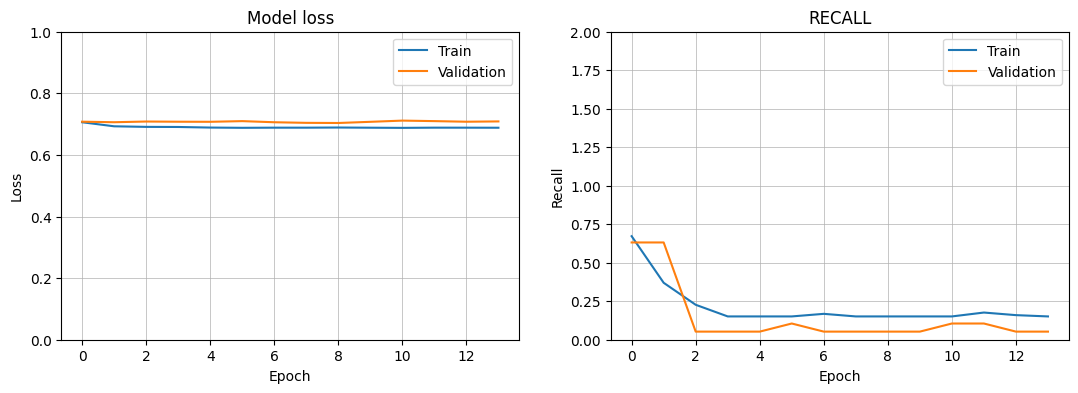

In [36]:
plot_loss_recall(history)

In [37]:
model_4rec.evaluate(X_4rec_test, y_4rec_test)

5/5 [==============================] - 9s 2s/step - loss: 0.6878 - recall: 0.1912


[0.6878282427787781, 0.19117647409439087]